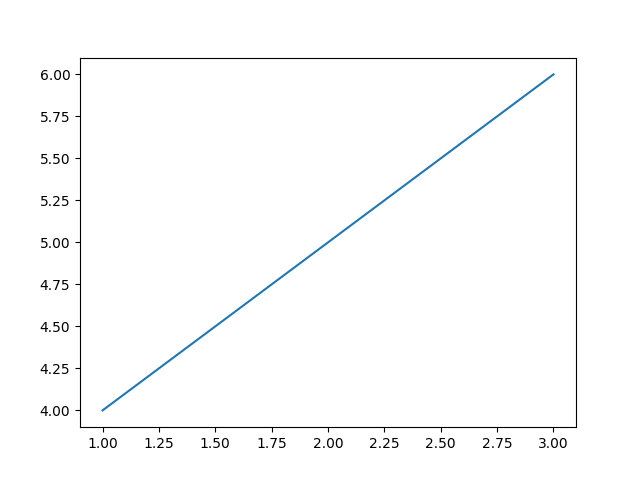

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector

import ipywidgets as widgets


#%matplotlib notebook
%matplotlib widget
 
#測試可畫
plt.plot([1, 2, 3], [4, 5, 6])
plt.show()



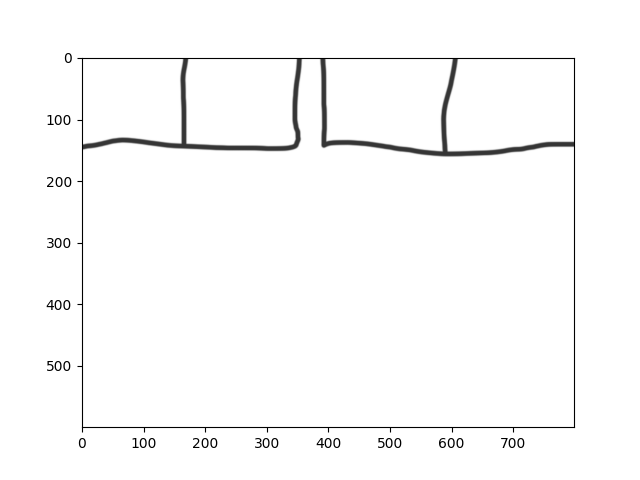

In [3]:

# 讀取圖片
img_path = "edge.tif"
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# 顯示圖片
fig, ax = plt.subplots()
ax.imshow(image)


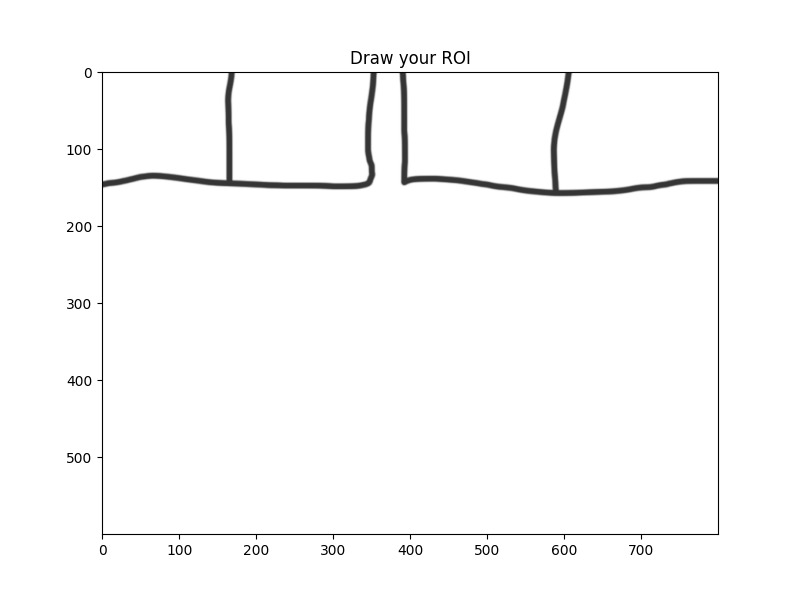

In [4]:

# 全域變數儲存ROI座標
roi_coords = []

# ROI 框選回呼函數
def onselect(eclick, erelease):
    """ 儲存使用者框選的 (x1, y1) 和 (x2, y2) 座標 """
    global roi_coords
    x1, y1 = int(eclick.xdata), int(eclick.ydata)
    x2, y2 = int(erelease.xdata), int(erelease.ydata)
    roi_coords = [(x1, y1), (x2, y2)]
    print(f"選取ROI座標: ({x1}, {y1}) -> ({x2}, {y2})")

# 繪製影像並啟動選框工具
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(image)
ax.set_title("Draw your ROI")

# 修正：Matplotlib 3.10.1 不再支援 drawtype 參數
rect_selector = RectangleSelector(
    ax, onselect,
    interactive=True  # 允許互動
)

plt.show()


p1= 230, 56 ; p2= 516, 215 


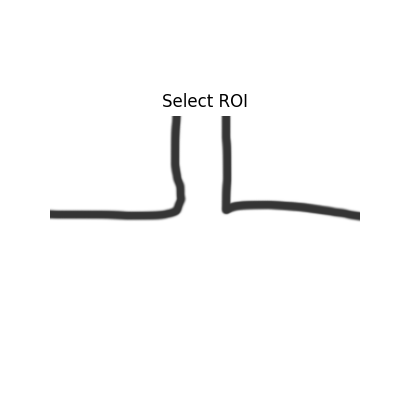

In [5]:

# 如果有選取ROI，顯示該ROI
if roi_coords:
    (x1, y1), (x2, y2) = roi_coords
    print(f"p1= {x1}, {y1} ; p2= {x2}, {y2} ")
    roi = image[y1:y2, x1:x2]  # 提取ROI
    plt.figure(figsize=(4, 4))
    plt.imshow(roi)
    plt.title("Select ROI")
    plt.axis("off")
    plt.show()